# Task 2: Predict Future Stock Prices (Short-Term)

**Objective:**  
Use historical stock data to predict the next day's closing price using features like Open, High, Low, and Volume. Visualize predictions versus actual closing prices.

---

## Import Libraries

We will use `yfinance` to fetch stock data, `pandas` and `numpy` for data manipulation, `scikit-learn` for modeling,`matplotlib` & `seaborn` for visualization.


In [2]:
import yfinance as yf
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

## Load Historical data

In [13]:
# select stock: Apple
ticker = "AAPL"
df = yf.download(ticker, start='2020-01-01', end='2024-12-01')

df.head()

C:\Users\Asfa\AppData\Local\Temp\ipykernel_6700\2092847438.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-12-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468254,72.528574,71.223252,71.476592,135480400
2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2020-01-06,72.335541,72.374146,70.634524,70.885457,118387200
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200


## Preprocessing and feature engineering

In [15]:
# Flatten columns if MultiIndex exists
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Create next day target
df['Next_Close'] = df['Close'].shift(-1)
df = df.dropna()

# Select features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # maintain time series order
)

## Model Training

In [16]:
# Using random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict next day closing prices
y_pred = model.predict(X_test)

## Model evaluation

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 488.13
R-squared Score: 0.02


## Plot Actual vs Predicted Closing Prices

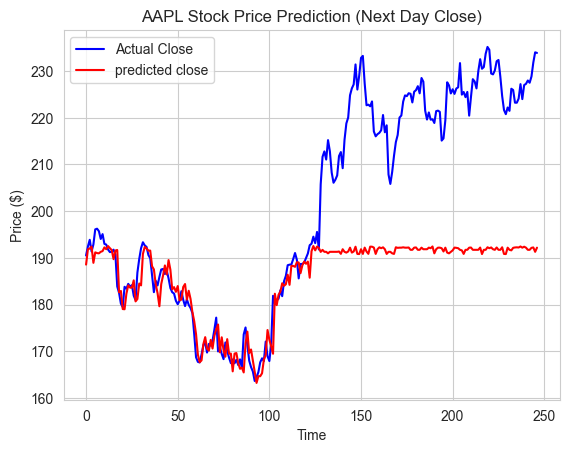

In [18]:
plt.Figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='predicted close', color='red')
plt.title(f"{ticker} Stock Price Prediction (Next Day Close)")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

## Insights
 1. The model predicts next-day closing prices based on Open, High, Low, and Volume.
 2. Random Forest captures non-linear patterns better than linear regression.
 3. Performance metrics (MSE, R2) indicate how close the predictions are to actual prices.
 4. This approach can be extended with more features (technical indicators) for higher accuracy.
